<img src = "https://escp.eu/sites/default/files/logo/ESCP-logo-white-misalign.svg" width = 400 style="background-color: #240085;">
<h1 align=center><font size = 6>ESCP Business School</font></h1>
<h3 align=center><font size = 5>SCOR Datathon</font><br/>
<font size = 3>The Data Science Challenge Bridging Indian Agricultureal Protection Gap</font></h3>
<h6 align=center>Chapter 3B - Analysis to Clustering Methods (Rabi - Free Level)</h6>

Last Updated: December 09, 2021\
Author: Group 21 - Anniek Brink, Jeanne Dubois, and Resha Dirga

<h3>Chapter Objectives</h3>

<p>This chapter aims to define the best clustering methods to use for the datasets. There are <b><u>four</u></b> methods that we are going to test on this chapter:</p>

<ul>
    <li>KMeans Clustering</li>
    <li>Agglomerative Hierarchical Clustering</li>
    <li>Density-Based Spatial Clustering of Applications with Noise (DBSCAN)</li>
    <li>Mean-Shift Clustering</li>
</ul>

<b><i>Source:</i></b> <a href="https://towardsdatascience.com/the-5-clustering-algorithms-data-scientists-need-to-know-a36d136ef68">https://towardsdatascience.com/the-5-clustering-algorithms-data-scientists-need-to-know-a36d136ef68</a>

<h3>Chapter 1: Import modules</h3>
<p>This chapter lists all modules that being used on this document. The module import process will be performed on this chapter</p>

In [1]:
import numpy as np
import pandas as pd

from sklearn import metrics

import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import pickle

<h3>Chapter 2: Data Loading and Initial Plotting</h3>
<p>This chapter reads the data and provides a scatter plot as an initial overview. The chapter also gives an overview of value distribution using a histogram</p>

In [2]:
filename = "datasets_preprocessed/df_rabi_preprocessed_to_cluster.csv"

In [3]:
df = pd.read_csv(filename, delimiter=";", index_col = 0)

In [4]:
df = df.dropna(axis=1, how='all')
df = df.dropna()
data_to_clusters = df.drop(columns=['ID'])

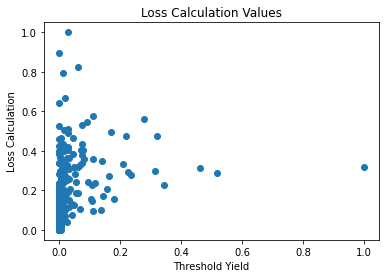

In [5]:
# View datapoints on plot charts

plt.scatter(df['threshold_yield'], df['loss_calculation'])
plt.title("Loss Calculation Values")
plt.xlabel("Threshold Yield")
plt.ylabel("Loss Calculation")
plt.show()

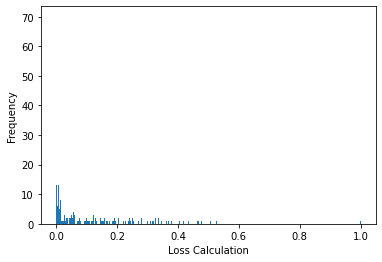

In [6]:
plt.hist(df['loss_calculation'], density=False, bins=1000)  # density=False would make counts
plt.ylabel('Frequency')
plt.xlabel('Loss Calculation');

<h3>Chapter 3: Modelling</h3>
<p>This chapter define and compile the model, incuding choosing the best hyperparameters for the model. This chapter will test several model and determine the best models based on analysis.
</p>

<h5>Method 1 - KMeans Clustering</h5>

In [7]:
# Import necessary modules
import faiss

In [8]:
data_to_clusters = data_to_clusters.to_numpy().astype(np.float32)

Clustering 488 points in 74D to 2 clusters, redo 1 times, 20 iterations
  Preprocessing in 0.00 s
  Iteration 19 (0.01 s, search 0.01 s): objective=2.01312e+07 imbalance=1.748 nsplit=0       
Clustering 488 points in 74D to 3 clusters, redo 1 times, 20 iterations
  Preprocessing in 0.00 s
  Iteration 19 (0.01 s, search 0.01 s): objective=1.45915e+07 imbalance=1.416 nsplit=0       
Clustering 488 points in 74D to 4 clusters, redo 1 times, 20 iterations
  Preprocessing in 0.00 s
  Iteration 19 (0.00 s, search 0.00 s): objective=1.37228e+07 imbalance=1.657 nsplit=0       
Clustering 488 points in 74D to 5 clusters, redo 1 times, 20 iterations
  Preprocessing in 0.00 s
  Iteration 19 (0.00 s, search 0.00 s): objective=7.93623e+06 imbalance=2.085 nsplit=0       
Clustering 488 points in 74D to 6 clusters, redo 1 times, 20 iterations
  Preprocessing in 0.00 s
  Iteration 19 (0.00 s, search 0.00 s): objective=6.26931e+06 imbalance=1.725 nsplit=0       
Clustering 488 points in 74D to 7 cluste

WARNING clustering 488 points to 13 centroids: please provide at least 507 training points
WARNING clustering 488 points to 14 centroids: please provide at least 546 training points


  Iteration 19 (0.01 s, search 0.00 s): objective=3.84307e+06 imbalance=1.468 nsplit=0       
Clustering 488 points in 74D to 13 clusters, redo 1 times, 20 iterations
  Preprocessing in 0.00 s
  Iteration 19 (0.01 s, search 0.00 s): objective=3.79898e+06 imbalance=1.521 nsplit=0       
Clustering 488 points in 74D to 14 clusters, redo 1 times, 20 iterations
  Preprocessing in 0.00 s


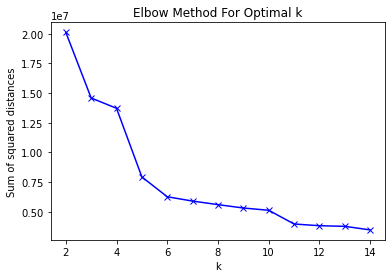

In [9]:
# Determine best k for clustering (check range from 1 to 10)

# Compile inertia values
Sum_of_squared_distances = []
k_test = range(2,15)

x = data_to_clusters.copy(order='C') # define datasets as x

niter = 20
verbose = True
d = x.shape[1]
for k in k_test:
    kmn_model = faiss.Kmeans(d, k, niter=niter, verbose=verbose)
    kmn_model.train(x)
    D, I = kmn_model.index.search(x, 1)
    Sum_of_squared_distances.append(sum(D))

# Shot k method graph
plt.plot(k_test, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum of squared distances')
plt.title('Elbow Method For Optimal k')
plt.show()


Clustering 488 points in 74D to 6 clusters, redo 1 times, 0 iterations
  Preprocessing in 0.00 s

Clustering 488 points in 74D to 6 clusters, redo 1 times, 1 iterations
  Preprocessing in 0.00 s
  Iteration 0 (0.00 s, search 0.00 s): objective=1.65907e+07 imbalance=1.320 nsplit=0       
Clustering 488 points in 74D to 6 clusters, redo 1 times, 2 iterations
  Preprocessing in 0.00 s
  Iteration 1 (0.00 s, search 0.00 s): objective=9.80872e+06 imbalance=1.430 nsplit=0       
Clustering 488 points in 74D to 6 clusters, redo 1 times, 3 iterations
  Preprocessing in 0.00 s
  Iteration 2 (0.00 s, search 0.00 s): objective=9.4919e+06 imbalance=1.516 nsplit=0       
Clustering 488 points in 74D to 6 clusters, redo 1 times, 4 iterations
  Preprocessing in 0.00 s
  Iteration 3 (0.00 s, search 0.00 s): objective=9.24913e+06 imbalance=1.593 nsplit=0       
Clustering 488 points in 74D to 6 clusters, redo 1 times, 5 iterations
  Preprocessing in 0.00 s
  Iteration 4 (0.00 s, search 0.00 s): object

  Iteration 35 (0.01 s, search 0.01 s): objective=6.26931e+06 imbalance=1.725 nsplit=0       
Clustering 488 points in 74D to 6 clusters, redo 1 times, 37 iterations
  Preprocessing in 0.00 s
  Iteration 36 (0.01 s, search 0.01 s): objective=6.26931e+06 imbalance=1.725 nsplit=0       
Clustering 488 points in 74D to 6 clusters, redo 1 times, 38 iterations
  Preprocessing in 0.00 s
  Iteration 37 (0.01 s, search 0.01 s): objective=6.26931e+06 imbalance=1.725 nsplit=0       
Clustering 488 points in 74D to 6 clusters, redo 1 times, 39 iterations
  Preprocessing in 0.00 s
  Iteration 38 (0.02 s, search 0.01 s): objective=6.26931e+06 imbalance=1.725 nsplit=0       
Clustering 488 points in 74D to 6 clusters, redo 1 times, 40 iterations
  Preprocessing in 0.00 s
  Iteration 39 (0.01 s, search 0.01 s): objective=6.26931e+06 imbalance=1.725 nsplit=0       
Clustering 488 points in 74D to 6 clusters, redo 1 times, 41 iterations
  Preprocessing in 0.00 s
  Iteration 40 (0.02 s, search 0.01 s): 

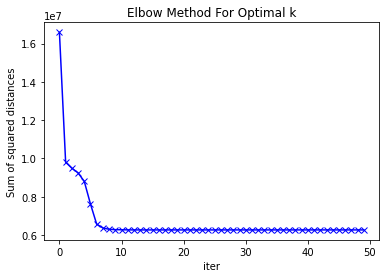

In [10]:
# Determine best iteration for clustering (check range from 10 to 50)

# Compile inertia values
Sum_of_squared_distances = []
i_test = range(0,50)

x = data_to_clusters.copy(order='C') # define datasets as x

k = 6 # from previous test
verbose = True
d = x.shape[1]
for i in i_test:
    kmn_model = faiss.Kmeans(d, k, niter=i, verbose=verbose)
    kmn_model.train(x)
    D, I = kmn_model.index.search(x, 1)
    Sum_of_squared_distances.append(sum(D))

# Shot k method graph
plt.plot(i_test, Sum_of_squared_distances, 'bx-')
plt.xlabel('iter')
plt.ylabel('Sum of squared distances')
plt.title('Elbow Method For Optimal k')
plt.show()


Clustering 488 points in 74D to 6 clusters, redo 1 times, 10 iterations
  Preprocessing in 0.00 s


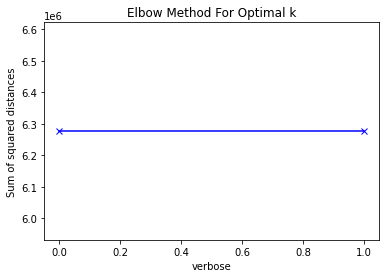

In [11]:
# Determine best verbose for clustering

# Compile inertia values
Sum_of_squared_distances = []
v_test = [False, True]

x = data_to_clusters.copy(order='C') # define datasets as x

k = 6 # from previous test
niter = 10 # from previous test
d = x.shape[1]
for v in v_test:
    kmn_model = faiss.Kmeans(d, k, niter=niter, verbose=v)
    kmn_model.train(x)
    D, I = kmn_model.index.search(x, 1)
    Sum_of_squared_distances.append(sum(D))

# Shot k method graph
plt.plot(v_test, Sum_of_squared_distances, 'bx-')
plt.xlabel('verbose')
plt.ylabel('Sum of squared distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [12]:
# Train K-Means model
x = data_to_clusters.copy(order='C') # define datasets as x

ncentroids = 6
niter = 10
verbose = True
d = x.shape[1]
kmn_model = faiss.Kmeans(d, ncentroids, niter=niter, verbose=verbose)
kmn_model.train(x)


Clustering 488 points in 74D to 6 clusters, redo 1 times, 10 iterations
  Preprocessing in 0.00 s


6282457.0

In [13]:
# Assign clustering result
D, I = kmn_model.index.search(x, 1)

df['kmn_clusters'] = I

Text(0, 0.5, 'Loss Calculation')

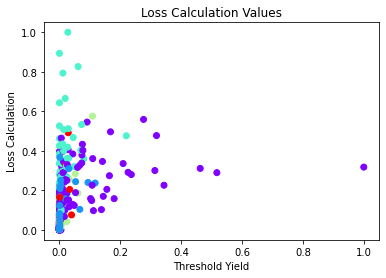

In [14]:
plt.scatter(df['threshold_yield'],
            df['loss_calculation'],
            c=df['kmn_clusters']
            ,cmap='rainbow')
plt.title("Loss Calculation Values")
plt.xlabel("Threshold Yield")
plt.ylabel("Loss Calculation")

<h5>Method 2 - Agglomerative Hierarchical Clustering</h5>

In [15]:
# Import necessary modules
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering

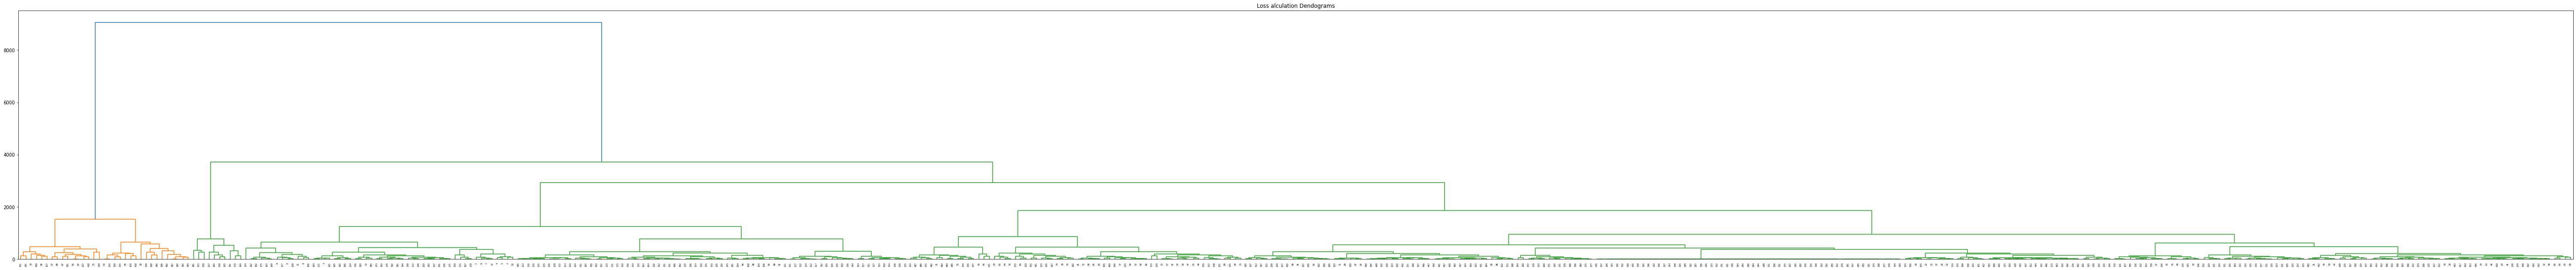

In [16]:
# Create overall dendogram
plt.figure(figsize=(100, 10))
plt.title("Loss alculation Dendograms")
dend = shc.dendrogram(shc.linkage(x, method='ward'))

plt.axhline(y=max(D), color='r', linestyle='--')

In [17]:
# Train and assign cluster to dataset
shc_model = AgglomerativeClustering(n_clusters=6, affinity='euclidean', linkage='ward')
df['shc_clusters'] = shc_model.fit_predict(x)

Text(0, 0.5, 'Loss Calculation')

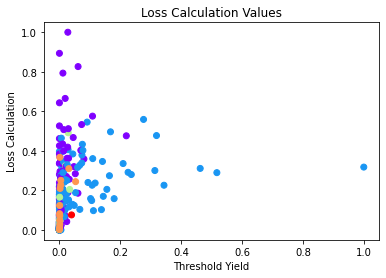

In [18]:
plt.scatter(df['threshold_yield'],
            df['loss_calculation'],
            c=df['shc_clusters']
            ,cmap='rainbow')
plt.title("Loss Calculation Values")
plt.xlabel("Threshold Yield")
plt.ylabel("Loss Calculation")

<h5>Method 3 - Density-Based Spatial Clustering of Applications with Noise (DBSCAN)</h5>

In [19]:
# Import necessary modules
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN

For 2-dimensional data, use DBSCAN’s default value of MinPts = 4 (Ester et al., 1996).
<br/>
<i>source: https://medium.com/@tarammullin/dbscan-parameter-estimation-ff8330e3a3bd</i>

In [20]:
# Train model for epsilon optimisation
neighbors = NearestNeighbors(n_neighbors=6)
neighbors_fit = neighbors.fit(x)
distances, indices = neighbors_fit.kneighbors(x)

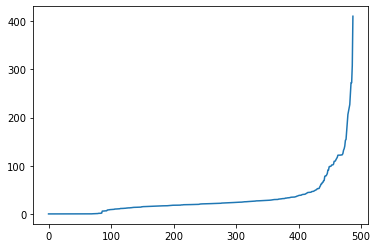

In [21]:
# Get distances for epsilon optimasion
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

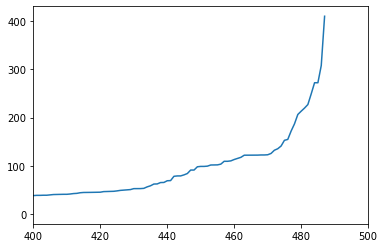

In [22]:
# Zoom in to elbow
plt.xlim([400,500])
plt.plot(distances)

In [23]:
# Train model for dataset and assign cluster to dataset
dbs_model = DBSCAN(eps=1/480, min_samples=4).fit(x)
df['dbs_clusters'] = dbs_model.labels_

Text(0, 0.5, 'Loss Calculation')

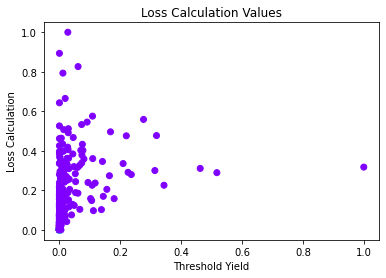

In [24]:
plt.scatter(df['threshold_yield'],
            df['loss_calculation'],
            c=df['dbs_clusters']
            ,cmap='rainbow')
plt.title("Loss Calculation Values")
plt.xlabel("Threshold Yield")
plt.ylabel("Loss Calculation")

<h5>Method 4 - Mean-Shift Clustering</h5>

In [25]:
# Import necessary modules
from sklearn.cluster import MeanShift, estimate_bandwidth

In [26]:
# Train model for dataset and assign cluster to dataset
bandwidth = estimate_bandwidth(x)
msc_model = MeanShift(bandwidth=bandwidth).fit(x)
df['msc_clusters'] = msc_model.labels_

Text(0, 0.5, 'Loss Calculation')

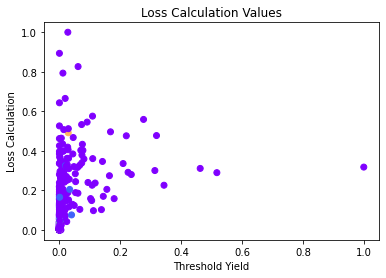

In [27]:
plt.scatter(df['threshold_yield'],
            df['loss_calculation'],
            c=df['msc_clusters']
            ,cmap='rainbow')
plt.title("Loss Calculation Values")
plt.xlabel("Threshold Yield")
plt.ylabel("Loss Calculation")

<h3>Chapter 3: Model evaluation</h3>
<p>This chapter explains the evaluation of models for the dataset and determine the best model to cluster the dataset. The choosen model will be applied across dataset with the same hyperparameters for consistency. To evaluate the model, we will use Davies Bouldin Index.</p>
<p>Please note that this chapter does not include the analysis of each cluster and definition to business context. Those analyses will be performed on the latter chapters.</p>

In [28]:
df

,ID,threshold_yield,loss_calculation,Average Temperature January (C),Average Temperature February (C),Average Temperature March (C),Average Temperature April (C),Average Temperature May (C),Average Temperature June (C),Average Temperature July (C),...,Average Sun Hours July,Average Sun Hours August,Average Sun Hours September,Average Sun Hours October,Average Sun Hours November,Average Sun Hours December,kmn_clusters,shc_clusters,dbs_clusters,msc_clusters
0,andhra pradesh_1.0_anantapur,0.001523,0.017028,24.3,26.9,30.2,32.3,31.7,28.5,27.2,...,8.3,7.9,8.4,8.6,8.0,8.1,3,0,-1,0
1,andhra pradesh_1.0_east godavari,0.060844,0.185710,23.8,25.3,27.8,29.9,31.9,30.4,28.6,...,10.1,9.7,9.0,8.7,8.9,8.7,3,0,-1,0
2,andhra pradesh_1.0_guntur,0.018902,0.068932,24.2,26.1,28.7,31.0,33.3,31.3,29.4,...,10.4,9.8,9.2,8.5,8.2,7.8,3,0,-1,0
3,andhra pradesh_1.0_kurnool,0.003742,0.085053,24.6,27.0,30.3,32.7,33.1,29.2,27.5,...,8.4,8.0,8.1,8.8,8.6,8.8,3,0,-1,0
4,andhra pradesh_1.0_prakasam,0.108780,0.575644,24.1,25.4,27.7,29.7,32.3,31.5,30.0,...,10.5,10.1,9.6,8.6,7.8,7.4,3,0,-1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
483,west bengal_3.0_malda,0.000325,0.011637,17.5,20.8,25.5,28.5,28.9,28.9,28.2,...,7.3,7.5,7.4,8.5,8.9,8.3,1,4,-1,0
484,west bengal_3.0_murshidabad,0.001167,0.071718,17.8,21.4,26.2,29.3,29.5,29.2,28.1,...,7.7,7.7,7.6,8.5,8.9,8.5,1,4,-1,0
485,west bengal_3.0_nadia,0.000580,0.082268,18.3,21.9,26.4,29.5,29.9,29.3,28.1,...,7.9,7.8,7.8,8.4,9.0,8.6,1,4,-1,0
486,west bengal_3.0_north 24 parganas,0.001026,0.048175,19.0,22.7,27.0,29.8,30.4,29.4,28.1,...,8.1,7.8,7.9,8.3,8.9,8.7,1,4,-1,0


In [29]:
for cluster in ['kmn', 'shc', 'dbs', 'msc']:
    try:
        score = metrics.davies_bouldin_score(x, df[cluster+'_clusters'])
        print(cluster, '> # of clusters:', len(df[cluster+'_clusters'].unique()), '| DBI:', score)
    except:
        pass

kmn > # of clusters: 6 | DBI: 0.8345254521290487
shc > # of clusters: 6 | DBI: 0.8615540966714574
dbs > # of clusters: 4 | DBI: 4.4804875420061645
msc > # of clusters: 9 | DBI: 0.5637601741865021


In [30]:
# Export csv before clustering for performance improvement
df.to_csv("datasets_clustered/rabi_clustered_done.csv", sep=';')

In [31]:
# Export selected model
model = shc_model
pickle.dump(model, open("clustering_models/model_rabi_level.pkl", "wb"))